# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

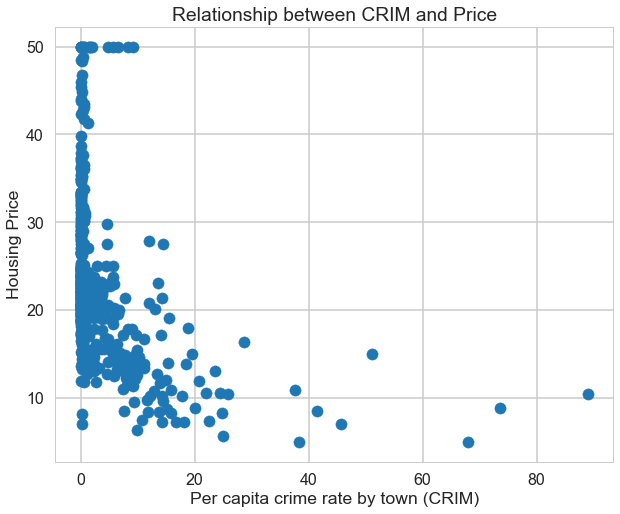

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")
plt.show()


### Exercise 1.1:  What kind of relationship do you see? e.g. positive, negative? linear? non-linear? Is there anything else strange or interesting about the data? What about outliers? ###
***
- From the scatter plot we can observe that mostly house price varies **negative**ly with the crime rate. This relationship is very clear when the crime rate is higher. In the low crime area, house prices varies significantly, which introduces outliers. Most of the house price ranges between 10 to 30 units of crime rates, which means people are more interested in safer but cost-efficient houses. 
- Intuitively, it makes perfect sense. Lower crime rate mean lower threat to the life, wealth, and property. It would definitely promote a healthier life. Besides, higher price does not guarantee safety. As we can see, some of the high priced areas have about 10% crime rate. The possible cause may be gun violence, bullying related or could be even something minor. In some cases, it could be even robbery and theft. Considering the trade off, optimal choice would be to buy less expensive houses in the are with lower crime ( 0-20%)
- Interestingly, house price does not decreases linearly with the increase of the crime rate. The shape of the plot is rather exponential(i.e.**non-linear**). 

### Exercise 1.2: Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see. ###
***


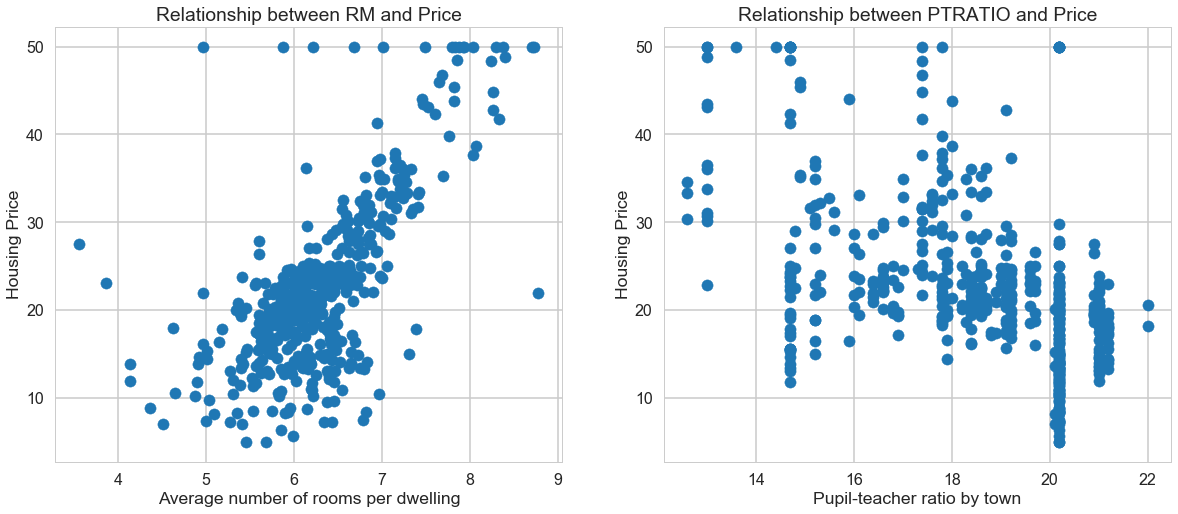

In [13]:
# scatter plot between *RM* and *PRICE*
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

plt.subplot(122)
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-teacher ratio by town")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

plt.show()


**Relationship between Room numbers and House Price**
***
- House price is **positively** correlated to the room number. In other words, houses with more rooms would cost more. 
- Usually, more rooms mean more space, or bigger house. Assuming all other factors like area, tax rate etc. to be constant, bigger house would cost more. Despite a few outliers, the linear relationship is obvious in the plot. 

<br>

**Relationship between House price and pupil-teacher ratio in the schools**
***
- Highly rated school is one of the most important factors in house pricing. Better schools have higher demands, which brings more people in the neighborhoods. As a result, the houses near these schools are more expensive. In most cases, these schools have a lower student to teachers ratio, but it may not be the case all the time. That is why, the scatter plot shows a high variance. 
- Despite that, a faint **linear(but Negative)** relationship is noticable in the plot. As we can see, in the areas, where pupil-teacher is lower, houses are more expensive.

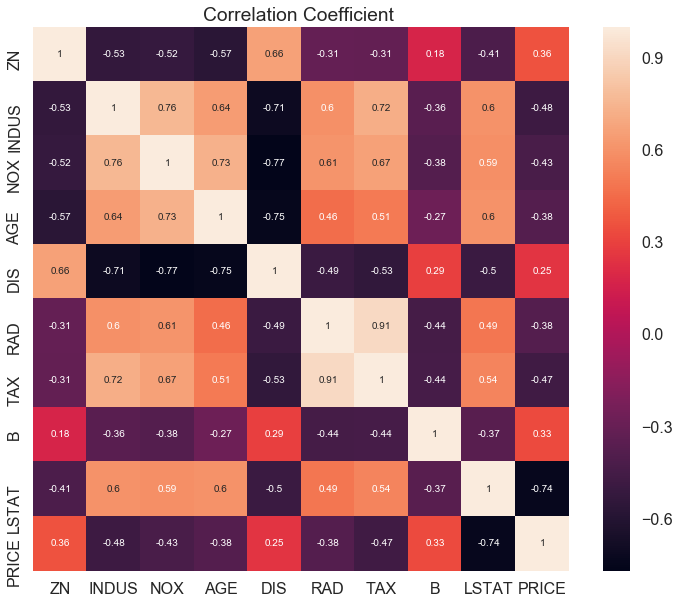

In [14]:
# Correlation coefficient between price and other columns
corr = bos[['ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX','B', 'LSTAT', 'PRICE']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, )
plt.title('Correlation Coefficient ')
plt.show()


### <p><b>Exercise 1.3:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p> ###

There is a strong but negative correlation between House Prices and  each of **LSTAT** ( Lower Class Population Percentage) and **INDUS**(Proportion of Industries). It is because, generally, if an area has high density of financially Lower class people, it is more prone to have a higher a crime rate. This type of areas are often found lacking the social environment to raise children, or have a sound life style. 

Smilarly, Industrial areas are also unhealthy for living. Different types of pollutants are often found in high quantity in these areas. We can also see a highly positive correlation between Industry density and property TAXes. Although areas with higher taxes are usually considered to be elite locality, most people cannot afford to live in these areas. Even people with higher income try to seek for a safe and clean area with lower property taxes. These factors will be more clear from the plots below.

**Plots Using Ipython Widgets**
***

In [15]:
# !pip install ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [16]:
# define a fuction to make plots
def make_plot(x):
    plt.figure(figsize=(10, 8))
    plt.scatter(bos[x], bos.PRICE)
    plt.xlabel(labels[x])
    plt.ylabel("Housing Price")
    plt.title("Relationship between %s and Price"%x)
    
# labels and indexs for the plots
labels = {'INDUS' : 'proportion of non-retail business acres per town',
              'LSTAT' : '% lower status of the population'}  
options=['INDUS', 'LSTAT']

# the drop-down widgets to have multiple plots
interact(make_plot, x = options)
plt.show()


interactive(children=(Dropdown(description='x', options=('INDUS', 'LSTAT'), value='INDUS'), Output()), _dom_classes=('widget-interact',))



#### Plots using *bokeh* library (optional) ####
***

In [17]:
from bokeh.models import  CategoricalColorMapper, Select, Slider, CustomJS
from bokeh.plotting import figure, ColumnDataSource
from bokeh.layouts import row, column, widgetbox
from bokeh.io import show, output_notebook


In [18]:
# the sources for the interactive bokeh plots
source = ColumnDataSource(data={
        'x': bos['INDUS'],
        'y': bos['PRICE']
    })

x_axis_dict = dict()
for x in options:
    x_axis_dict[x] = bos[x]
df_source = ColumnDataSource(data=x_axis_dict)


In [19]:
# add a drop-drown widget
x_select = Select(
    options=options,
    value='INDUS',
    title='Relationship Between Price and ',
)

# add a plot
plot = figure(y_axis_label='Hoursing Price',
              x_axis_label=labels[x_select.value],
              title="Relationship between INDUS and PRICE")
plot.circle('x', 'y', source=source, alpha=0.6)

# define the callback function
update_curve = CustomJS(args=dict(source=source,
                                  select=x_select,
                                  df_source=df_source,
                                  title=plot.title,
                                  axis=plot.xaxis[0]),
                        code="""
    var data = source.data;
    var f = select.value;
    var dat = df_source.data
    x = data['x']
    y = data['y']
    z = dat[f]
    for (i = 0; i < x.length; i++) {
        x[i] = z[i]
    }
    title.text = "Relationship between " +f +" and PRICE"
    axis.axis_label = f
    // necessary becasue we mutated source.data in-place
    source.change.emit();
""")

# initiate the callback
x_select.js_on_change('value', update_curve)

output_notebook(hide_banner=True)
show(column(widgetbox(x_select), plot))


### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

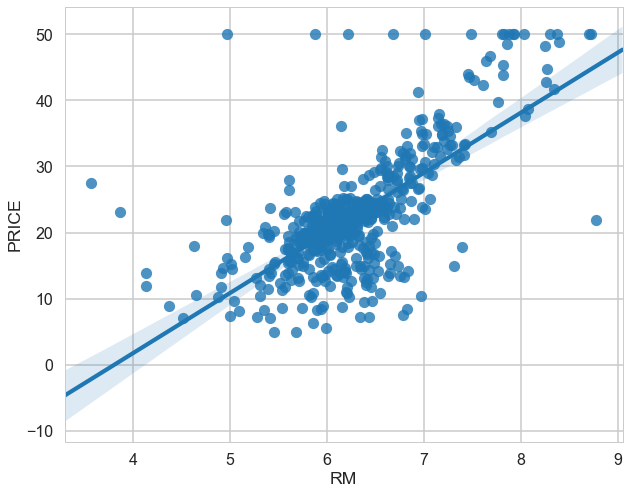

In [20]:
plt.figure(figsize=(10, 8))
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)
plt.show()


### Histograms
***


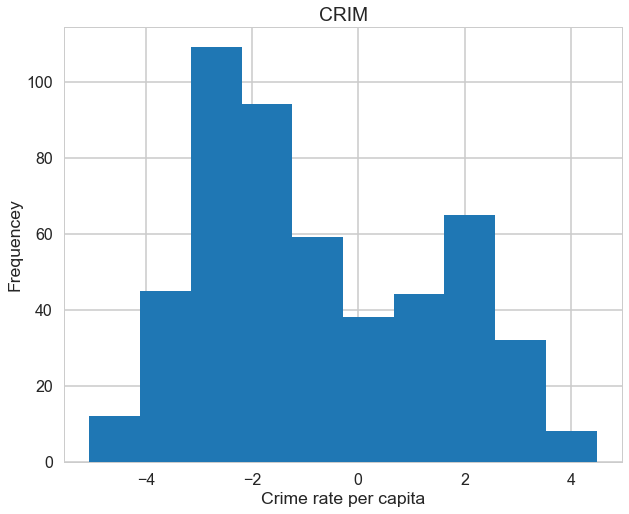

In [21]:
plt.figure(figsize=(10, 8))
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()


<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>
</div>

### Exercise 2.1: In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log.  ###
***

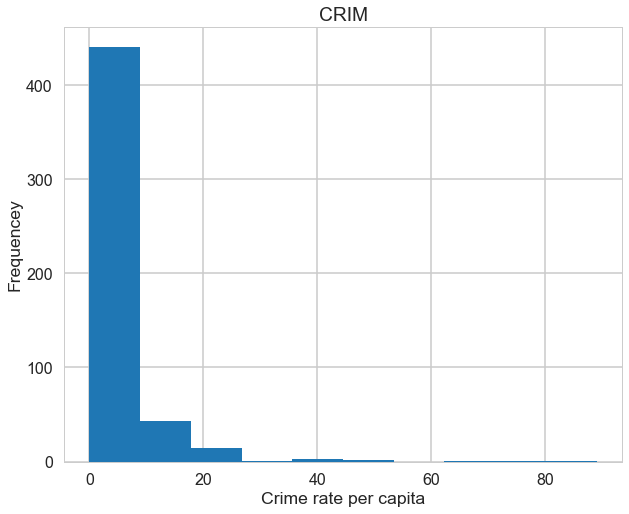

In [22]:
plt.figure(figsize=(10, 8))
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()


### Exercise 2.2: What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation? ###
***
**Logarithmic Scale**

Logarithmic scale uses the log of the values of a variable instead of the actual value to plot the points. By log scaling, the axis expands for the values within the range of 0 to 1 and shrinks for the values greater than 1. As a result, 
- wide spectrum of the input values can be shown within a shorter space
- any significant percent change becomes visible in the plot. 

The histogram of the Crime rate distribution shows a high skewness to the right. Effect of any change of frequency in the skewed area is not noticable due the steep change from 10 to 20 percent. By using the log scale, we can see that the percent change over the entrie crime data can easily be displayed. 

Moreover, the histogram with linear scale does not show the variance from 0 to 1 percent, which we can clearly see in the log scaled histogram. From linear scale histogram, it seems like all 400 houses are within the area with 0 to 10% crime rate. However, by log scaling the x axis it becomes more clear that the minute changes in the crime rate affects the number of houses in the area. For example, area with 1%-10% crime rate has only about 50 houses but an area with 0.1% crime rate has over 100 houses. This information gain is only possible by logarithmic transformation of the x axis.


### Exercise 2.3: Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here. ###
***

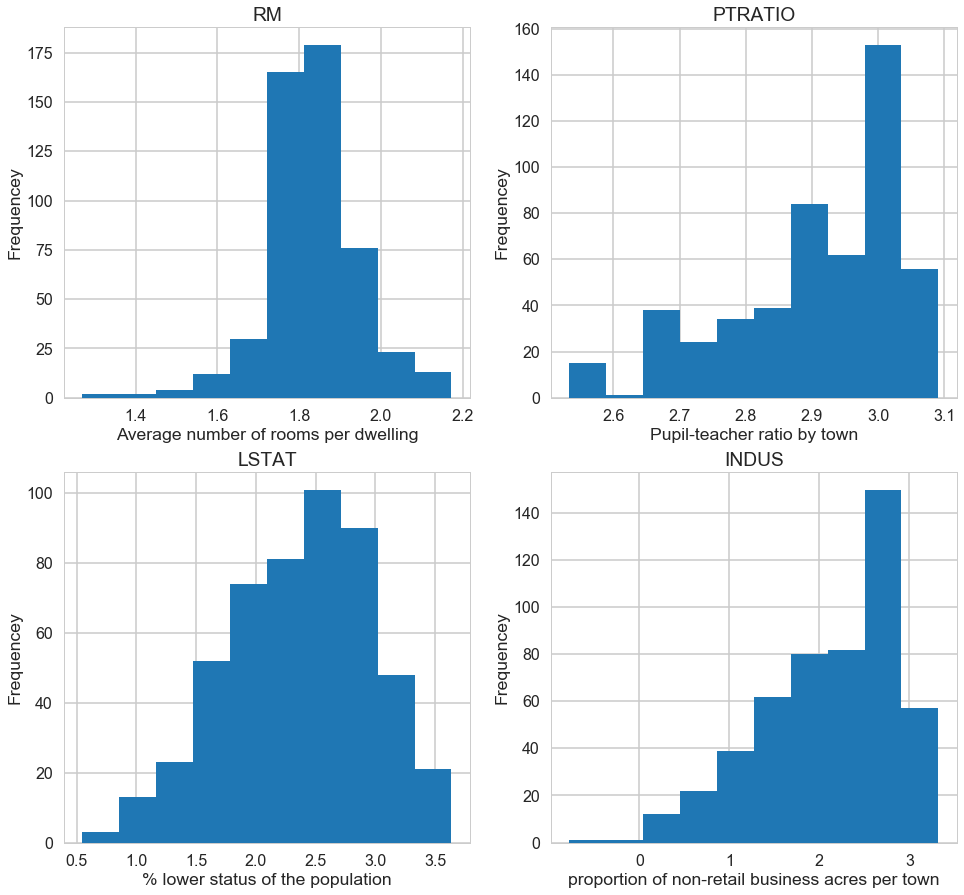

In [23]:
# histogram of RM, PTRATIO, LSTAT, INDUS respectively
plt.figure(figsize=(16, 15))
plt.subplot(221)
plt.hist(np.log(bos.RM))
plt.title("RM")
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel("Frequencey")

plt.subplot(222)
plt.hist(np.log(bos.PTRATIO))
plt.title("PTRATIO")
plt.xlabel("Pupil-teacher ratio by town")
plt.ylabel("Frequencey")

plt.subplot(223)
plt.hist(np.log(bos.LSTAT))
plt.title("LSTAT")
plt.xlabel('% lower status of the population')
plt.ylabel("Frequencey")

plt.subplot(224)
plt.hist(np.log(bos.INDUS))
plt.title('INDUS')
plt.xlabel('proportion of non-retail business acres per town')
plt.ylabel("Frequencey")
plt.show()


### Correlation in the predicting featrues ###
***

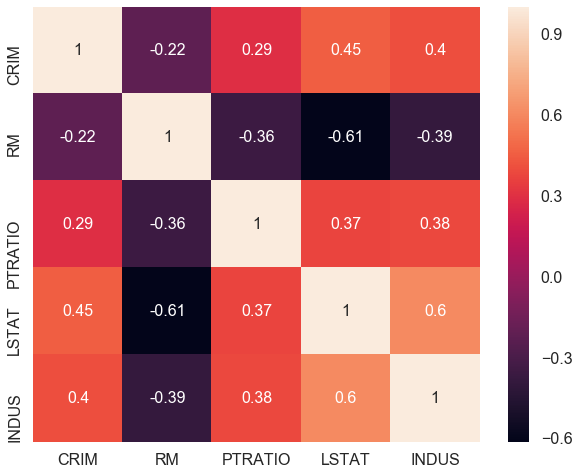

In [24]:
# plot the correlation coefficient of the predicting features
plt.figure(figsize=(10,8))
sns.heatmap(bos[['CRIM', 'RM', 'PTRATIO', 'LSTAT', 'INDUS']].corr(), annot=True, annot_kws={'size': 16})
plt.show()

**Observation and important note on feature selection** 
***
If the features are linearly correlated to each other, they may affect the perfomance of the model. It is, therefore, important to drop highly correlated features keeping only one of them. From the correlation heatmap, we see that selected features have a highest correlation coefficient of -0.61 (between LSTAT and RM) which is not that high to affect the accuracy of the model. Besides, from the histograms, we see that all of the 5 selected features have an effect on the housing distribution. That is why, we would use all of these features to train the regression model.

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [148]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [149]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 22 Jan 2019   Prob (F-statistic):           2.49e-74
Time:                        21:56:14   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices.</p>
</div>

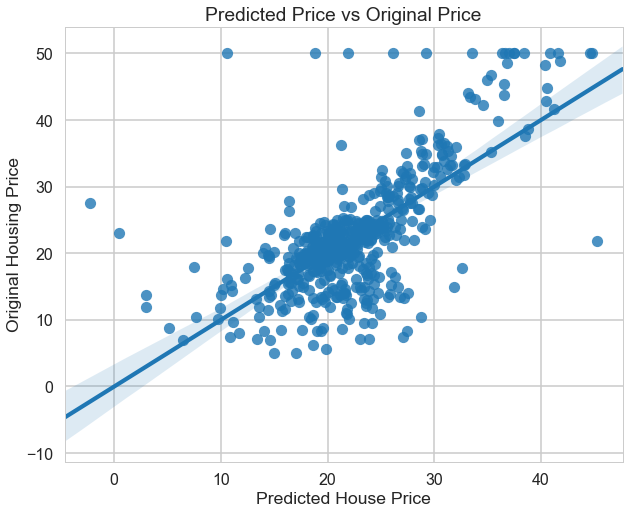

In [150]:
# make a scatter plot of the predicted price and the original price
plt.figure(figsize=(10, 8))
sns.regplot(m.fittedvalues, bos.PRICE)
plt.xlabel("Predicted House Price")
plt.ylabel("Original Housing Price")
plt.title("Predicted Price vs Original Price")
plt.show()

### Exercise 3.2:  How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see. ###
***
The plot looks almost identical to the scatter plot of Room Number vs House Price. The only difference is that the x-axis is scaled in this plot. In short, the model just weighted the number of rooms to predict the house price. Since no significant change was made and the intercept term was 0, the overall shape of the plot did not change. The predicted price have a linear relationship with the original price. 

The weird part is that some of the predicted prices are negative. In reality it is not meaningful and non-sense. In the model summmary we see the intercept is -34.67, which means that if there is no room  in the house, the predicted price will be -34670 dollar. It is absurd. The bias term need to be ignored (i.e. the intercept should be 0) in this case so that the regression line goes through the origin. 

### Fitting Linear Regression using `sklearn`


In [151]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [152]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [153]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [154]:
# your turn
# change the model to not fit an intercept term
# lm.fit_intercept = False

# the alternative way
# lm = LinearRegression(fit_intercept=False)


**Model should not fit to the intercept**

As mentioned earlier, intercept term is equal to the average house price when all the features are set to 0. In reality, all features will never be 0. For example, one of the feature is average room in the house. In this type of cases the intercept is not meaniful. However, dummy coded catagorical features can introduce discrepencies. To adjust the effect intercept term is needed. Since in the house price dataset, we have dummy coded variables, I do not recommend to change the model to fit the intercept to 0. 

**The 'iid' assumption of residuals**

The iid assumption states that in a linear model, all the residuals are independent of each other and identically distributed. The residuals should not be correlated to each other. All the residuals are assumed to be sampled from the distributions with  indentical variance or from the same distribution. 
If the residual distribution is normal, the second assumption that they are sampled from the distributions with identical variance is satisfied. However, it does not guarantee that the residuals or the features are independent or un-correlated. To satisfy the iid assumption, independence of the residuals need to be checked as well.


**Normality of the Y**

The most important condition of the linear regression is that the target variable and the feature variables have to be linearly correlated. Normality of either the target variable or the feature variable is not a assumption for linear regression. 

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `lm.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [155]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.491103280364015


In [156]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [157]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [158]:
# first five predicted prices
lm.predict(X)[0:5]


array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

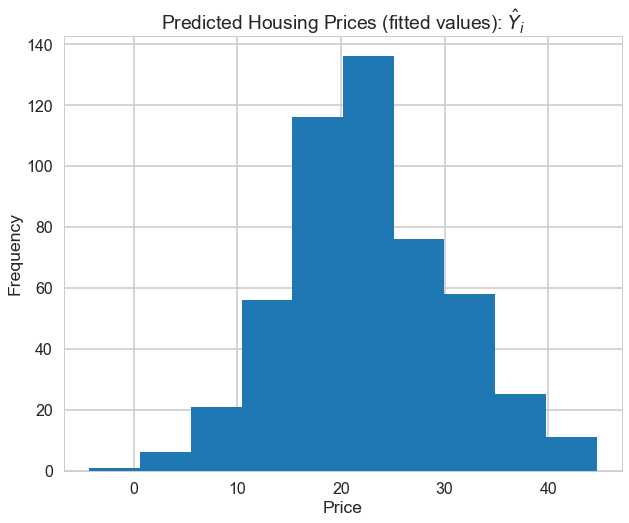

In [159]:
# histogram of all the predicted prices
plt.figure(figsize=(10,8))
plt.hist(lm.predict(X))
plt.title('Predicted Housing Prices (fitted values): $\hat{Y}_i$')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


**Observations from the histogram**
***
The predicted price is normally distributed. The shape of the distribution is nearly bell-shaped. The distribution is centered at 20 and spreads about 25 units on both side. Some of the predicted values fall into a negative range, which is meaningless because in real life price cannot be negative. 
These outliers may be caused by either one or all of the following reasons
- incorrect use of the dummy variables
- two or more predictors are correlated which widens the coefficients' confidence intervals and decreases the precisions
- high variances in some predictors which includes outliers

To avoid such errors, a few optimization steps can be taken.
- We can drop one variable at a time and observe if there is any significant change in the prediction and errors
- we can remove potential outliers from the predictors
- if there are highly correlated variables, we can use only one of them for the regression and drop other ones.

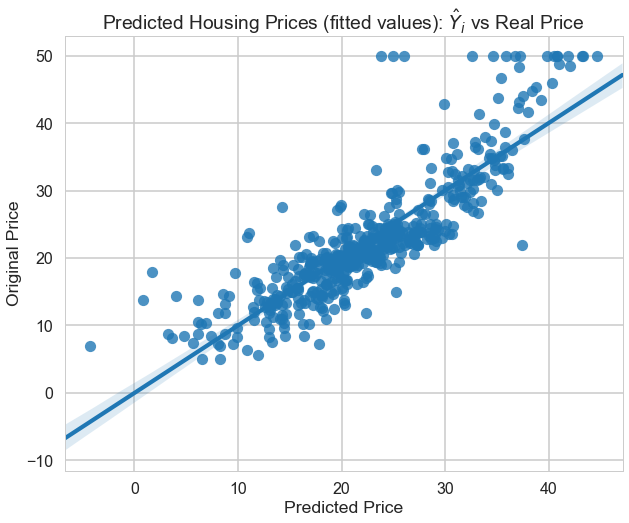

In [160]:
# your turn
plt.figure(figsize=(10,8))
sns.regplot(lm.predict(X), bos.PRICE)
plt.title('Predicted Housing Prices (fitted values): $\hat{Y}_i$ vs Real Price' )
plt.xlabel('Predicted Price')
plt.ylabel('Original Price')
plt.show()


### Comparison between scikit-learn and statmodels ###

From the scatter plots, we can see both scikit-learn and statmodels outputs same result for the regression analysis. Both regression models predicted same house prices. The coeffiecient and intercept are also the same.

One of the convenient features of statmodels is the model summary. It sums up all the information in short space which makes it easy to observe all the parameters using only 1 line of code. However, it works like a grey box. Although the algorithm finds the appropriate weight/coefficient for us, the relationship between the independent and dependent variables need to be specified in the code. Scikit-learn provides an extra benefit in this case. It works like a blackbox method. It takes the fetures as an input and finds the appropriate relationship as well as the parameters. Unlike statmodels scikit-learn regression model does not output the error parameters such as $R^2$ or F-statistics. A seperate functions from the scikit-learn package are required to find those. 


### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [161]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))


11080.276284149873


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [162]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)


5.801896515235221e-23


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

**Using statmodels approach**
***

In [163]:
# your turn
# using statmodels approach 
m1 = ols('PRICE ~ PTRATIO',bos).fit()
print(m1.summary())


                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 22 Jan 2019   Prob (F-statistic):           1.61e-34
Time:                        21:58:13   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

**Using sklearn approach**
***

In [164]:
# initialize the regressor
lm = LinearRegression()

# Train/fit the model
lm.fit(bos[['PTRATIO']], bos.PRICE)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [165]:
# predict the house price 
predicted_price = lm.predict(bos[['PTRATIO']])

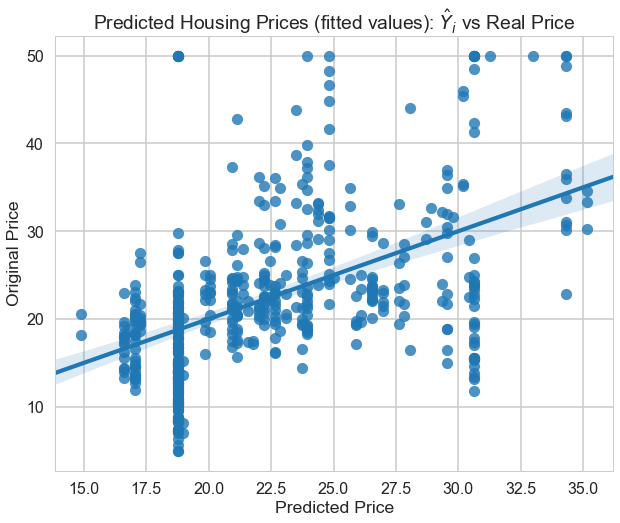

In [169]:
# plot the predicted price vs original price
plt.figure(figsize=(10,8))
sns.regplot(predicted_price, bos.PRICE)
plt.title('Predicted Housing Prices (fitted values): $\hat{Y}_i$ vs Real Price' )
plt.xlabel('Predicted Price')
plt.ylabel('Original Price')
plt.show()


In [170]:
print( "The intercept of the regression model: {:0.4f}".format(lm.intercept_))
print("The coefficients of the regression model: {:0.4f}".format(lm.coef_[0]))

The intercept of the regression model: 62.3446
The coefficients of the regression model: -2.1572


**Interpretation of the intercept and the coefficients**

Intercept is the bias term of the model. It indicates that if the pupil to Teacher ratio aproaches to 0, the average house price is expected to be the highest: $\$62,344.63$. The coefficients are the slopes that indicate the rate of change. In this case, a unit increase in pupil to teacher ratio is associated with $\$2,157.18$ decrease in the house price. Likewise, the decrease in the ratio is associated to $\$2,157.18$ increase in the house price. 

In [171]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import f_regression

print("R-squared value: {:0.4f}".format(r2_score(bos.PRICE, predicted_price)))
print("F-statistics : {:0.4f}".format(f_regression(bos[['PTRATIO']], bos.PRICE)[0][0]))
print("p-value : {:0.4}".format(f_regression(bos[['PTRATIO']], bos.PRICE)[1][0]))

R-squared value: 0.2578
F-statistics : 175.1055
p-value : 1.61e-34


- The coefficient of deteremination is 0.2578. This means that PTRATIO describes only 25.78% of the total variance in the house price. The model is not a very good fit for the house price. 

- From the F-statistics we notice that the p-value is very small (almost 0). The model, therefore, has a statistical significance in predicting the house price. The PTRATIO feature significantly contribute to the regression analysis. The F-test rejects the null hypothesis that the regression coefficient is 0.

- In the statmodels' model summary we notices the p-value of t-statistics is also very small(literally 0.0). It indicates that the regression coefficient has a statistical significance. It shows the same result as the F-statistics.
- The intereseting point to notice in the statmodels summary that, $t^2 = F$ because only one variable(RM) is used to train the model.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [172]:
# using STATMODELS
m2 = ols('PRICE ~ RM + CRIM + PTRATIO',bos).fit()
print(m2.summary())


                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Tue, 22 Jan 2019   Prob (F-statistic):           1.09e-97
Time:                        21:59:07   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

In [173]:
# Using SCIKIT-LEARN 
lm = LinearRegression()
lm.fit(X[['RM', 'CRIM', 'PTRATIO']], bos.PRICE)
predicted_price = lm.predict(X[['RM', 'CRIM', 'PTRATIO']])

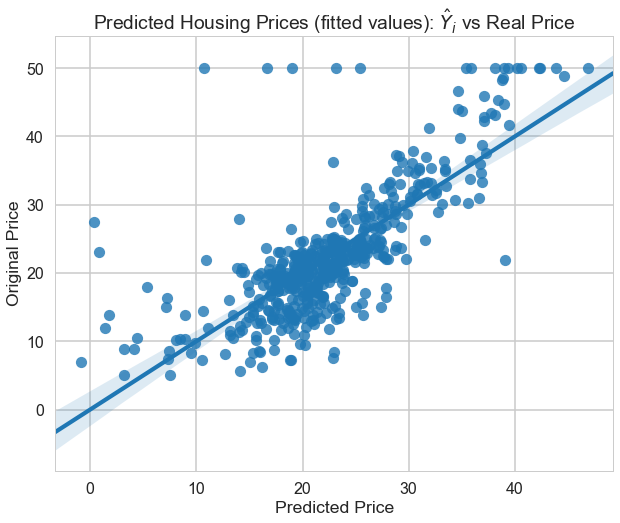

In [174]:
# plot the predicted price vs original price
plt.figure(figsize=(10,8))
sns.regplot(predicted_price, bos.PRICE)
plt.title('Predicted Housing Prices (fitted values): $\hat{Y}_i$ vs Real Price' )
plt.xlabel('Predicted Price')
plt.ylabel('Original Price')
plt.show()


In [175]:
print( "The intercept of the regression model: {:0.4f}".format(lm.intercept_))
print("The coefficients of the regression model: ", list(zip(['RM','CRIM', 'PTRATIO'],lm.coef_)))
print("R-squared value: {:0.4f}".format(r2_score(bos.PRICE, predicted_price)))
print("F-statistics : {:0.4f}".format(f_regression(X[['RM', 'CRIM','PTRATIO']], bos.PRICE)[0][0]))
print("p-value : {:0.4}".format(f_regression(bos[['RM', 'CRIM','PTRATIO']], bos.PRICE)[1][0]))

The intercept of the regression model: -3.3066
The coefficients of the regression model:  [('RM', 7.381566702411113), ('CRIM', -0.2021097105255002), ('PTRATIO', -1.0741867978442858)]
R-squared value: 0.5934
F-statistics : 471.8467
p-value : 2.487e-74


- F-statistics shows that the p-value is very small (approximately 0). The model has a statistical significance. The regression coefficients are non-zero. The features as a whole significantly contribute to the regression analysis
- R-squred value is 0.5934. This predictors describe about 59.34% of the total variation in the house price. It is a much better model than the previous ones.
- Since all of thre three variables have p-value in t-statistics 0.00, all of them are statistically significant.


## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [176]:
# using STATMODELS
m3 = ols('PRICE ~ RM + CRIM + PTRATIO + INDUS + LSTAT',bos).fit()
print(m3.summary())


                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     214.0
Date:                Tue, 22 Jan 2019   Prob (F-statistic):          9.77e-122
Time:                        21:59:16   Log-Likelihood:                -1550.7
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0738      3.979      4.291      0.0

**Compare the models using F-test**

In [177]:
# Compare the nested models using F-stats
F, p_value, DFF_DFR = m3.compare_f_test(m2)

print("Nested F-Statistics: {}".format(F))
print("Corresponding P-value: {}".format(p_value))

if(p_value<0.05):
    print("Since the P-value is smaller than alpha = 0.5",
          "the null hypothesis: coefficient of the added features are 0 is rejected.\n",
          "The unrestricted or FUll model(5 features) is better than the restricted or reduced model(3 features).")
else:
    print("Since the P-value is bigger than alpha = 0.5",
          "the null hypothesis: coefficient of the added features are 0 is not rejected.",
          "The restricted or reduced model(3 features) is better than the unrestricted or FULL model(5 features).\n")

Nested F-Statistics: 69.1867756617154
Corresponding P-value: 2.9770063196294926e-27
Since the P-value is smaller than alpha = 0.5 the null hypothesis: coefficient of the added features are 0 is rejected.
 The unrestricted or FUll model(5 features) is better than the restricted or reduced model(3 features).


**Compare the models using AIC**

The AIC of the Reduced model has 3233 and the AIC of the FULL model is 3113. Since the Full model has lower AIC, it is better than the restricted model.


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

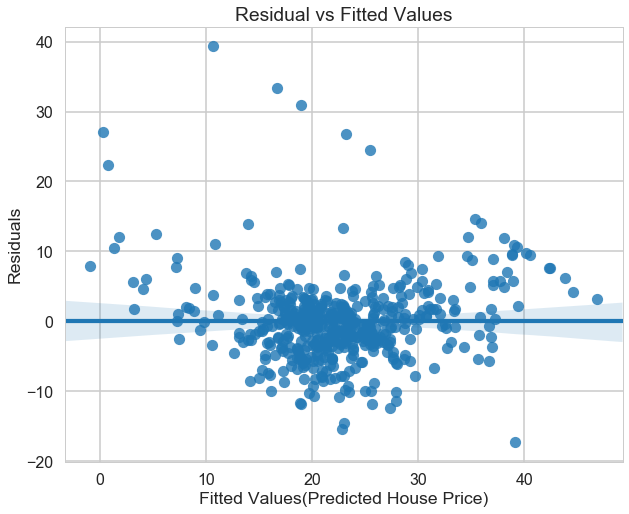

In [178]:
# Residuals vs fitted price plot
plt.figure(figsize=(10, 8))
sns.regplot(m2.fittedvalues, m2.resid)
plt.xlabel("Fitted Values(Predicted House Price)")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted Values")
plt.show()

- The residuals randomly scattered around the 0 line. This proves the linearity assumption of the linear regression. The dependent variable **Y** does have a linear relationship with the predictors **X**. 

- The residuals roughly form a "horizontal band" around the 0 line. This suggests that the variances of the error terms are equal. 

- A few residuals are above 20 line, which "stand out" from the basic random pattern of residuals. This suggests that there may be outliers in the data. 

**Q-Q plot of the Residuals**

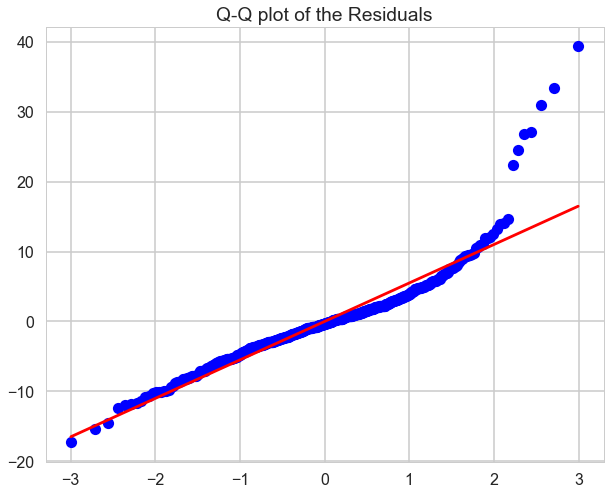

In [179]:
plt.figure(figsize=(10, 8))
stats.probplot(m2.resid, plot=plt)
plt.title("Q-Q plot of the Residuals")
plt.xlabel("")
plt.ylabel("")
plt.show()

In the QQ plot most of the points at the beginning falls on the straight line but twoards the end, it curves up. This non-linearity suggests that the residuals are not normally distributed. There are some outliers. 

**Advantages and disavantages of these plots**

The residuals vs fitted plots verifies the linearity assumption of the regression analysis. It is a scatter plot that clearly displays how well each data point is fitted, which in turn explains the relationship between fitted values and the observed values. Since it is not normalized, it does not convey information about the overall distribution. On the other hand, qq plot normalizes and sorts the data, which makes it difficult to explain the locattion of each residual point but helps explaining the overall shape of the distribution. 

Although both plot verify if there is any outlier in the distribution, residuals vs fitted value plot shows exatly which points are considered to be outliers. 

**Outliers in the data**

In [180]:
outliers = bos[['CRIM','RM','PTRATIO', 'PRICE']][m2.resid>20]
outliers

,CRIM,RM,PTRATIO,PRICE
365,4.55587,3.561,20.2,27.5
367,13.52220,3.863,20.2,23.1
368,4.89822,4.970,20.2,50.0
369,5.66998,6.683,20.2,50.0
370,6.53876,7.016,20.2,50.0
371,9.23230,6.216,20.2,50.0
372,8.26725,5.875,20.2,50.0


- The last 5 outliers show no variation in house price but some noticable variation in 2 predictors. Pupil to teacher ratio is same for all of them. Crime rate varies within 4.9-9.23 only. Average number of rooms also vary around 5-7. In reality it is possible to have expensive houses with decent amount of rooms in the area with good schools, and low crime rate (<10%). This houses are really not very predictable. Other features such as distance from a big city, availability of retail businesses, and other available factors may explain this house prices. 

- On the other hand, the first two outliers are also not predictable. Area with low crime and good schools having an inexpensive house with good number of rooms is unexpected. Additional information such as house quality, which is not collected, would probably help explaining such cases.

- Another possible reason for some of these outliers is the presence of different type of biases. For example, there might be a selection bias in data collection. The dataset is too small to find the appropriate relationship between predictors and predicted values. It does not show the bigger picture of Boston. 



**High Leverage points and their influence**

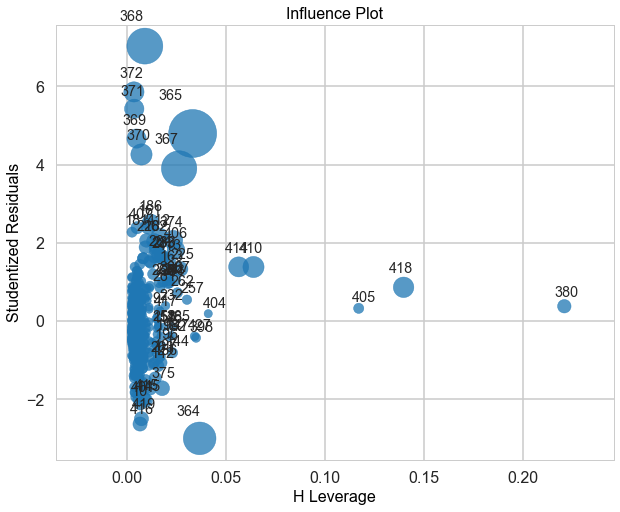

In [249]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(10, 8))
fig = influence_plot(m2, ax=ax)


The indices of the points with high leverage are **380, 418, 405, 410, and 414** in a descending order; but they do not have much influence on the regression. In the plot they have extreme x value, but y value is close to 0. Below are the data related to these points: 

In [197]:
bos.loc[[380, 418, 405, 410, 414],['CRIM', 'RM', 'PTRATIO', 'PRICE']]

,CRIM,RM,PTRATIO,PRICE
380,88.9762,6.968,20.2,10.4
418,73.5341,5.957,20.2,8.8
405,67.9208,5.683,20.2,5.0
410,51.1358,5.757,20.2,15.0
414,45.7461,4.519,20.2,7.0


There is a stronger relationship between the prices of these houses and the crime rate of the area. In the plot below, we can see these points are very close to the regression line, as they do not have much influence on the line.

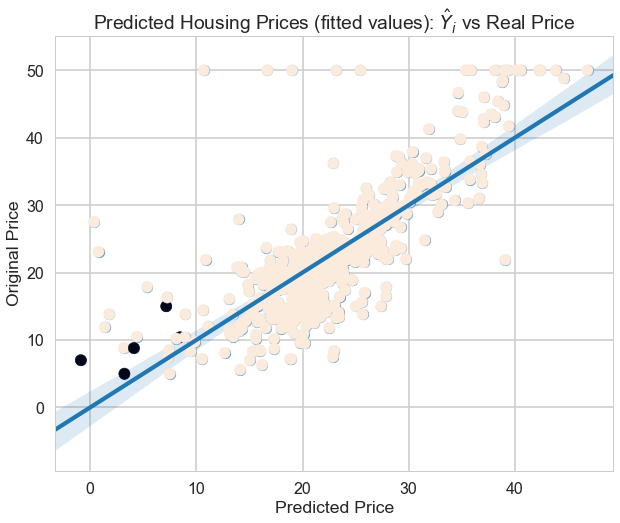

In [248]:
# plot the predicted price vs original price
color = np.ones(len(bos))
color[[380, 418, 405, 410, 414]] = 0
plt.figure(figsize=(10,8))
sns.regplot(m2.fittedvalues, bos.PRICE)
plt.scatter(m2.fittedvalues, bos.PRICE, c=color, alpha=1)
plt.title('Predicted Housing Prices (fitted values): $\hat{Y}_i$ vs Real Price' )
plt.xlabel('Predicted Price')
plt.ylabel('Original Price')
plt.show()


**Residuals at the highe leverage points**

In [264]:
m2.resid[[380, 418, 405, 410, 414]]

380    1.953388
418    4.695153
405    1.783200
410    7.844553
414    7.893622
dtype: float64

### Regression without the leverage points and outliers###

In [265]:
# drop the outliers and leverage points
X = bos.drop([365, 367, 368, 369, 370, 371, 372, 380, 405, 410, 414, 418])


In [258]:
# using STATMODELS
m4 = ols('PRICE ~ RM + CRIM + PTRATIO', X).fit()
print(m2.summary())


                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Tue, 22 Jan 2019   Prob (F-statistic):           1.09e-97
Time:                        23:41:02   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

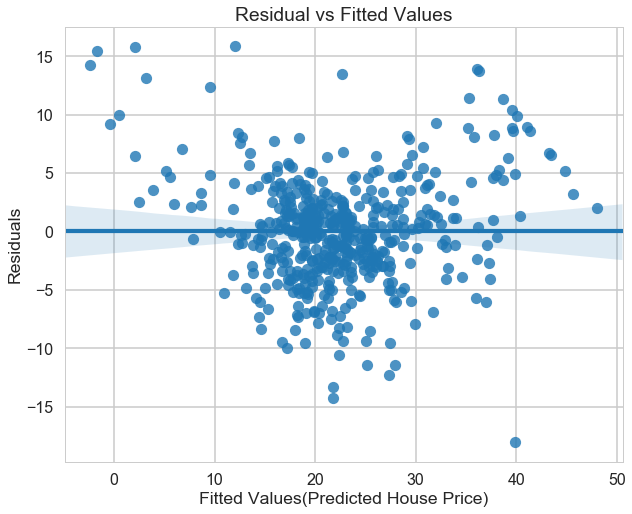

In [259]:
# Residuals vs fitted price plot
plt.figure(figsize=(10, 8))
sns.regplot(m4.fittedvalues, m4.resid)
plt.xlabel("Fitted Values(Predicted House Price)")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted Values")
plt.show()


Although the distribution of the points are more even, but a non-linear pattern is very clear. Most of the points are close to the 0 line and within 10 to -10 range scattered randomly to create a linear pattern. 

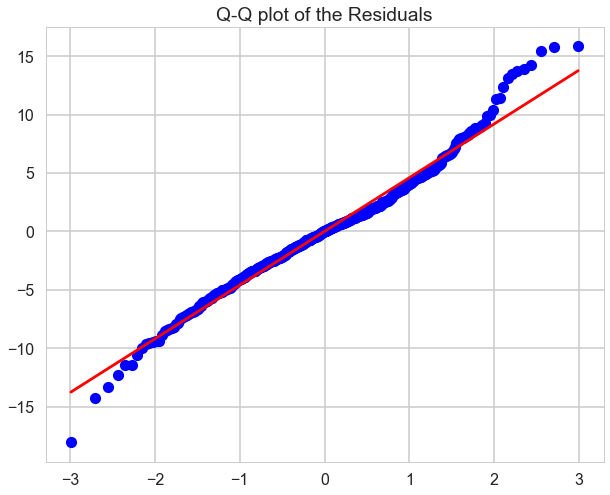

In [260]:
plt.figure(figsize=(10, 8))
stats.probplot(m4.resid, plot=plt)
plt.title("Q-Q plot of the Residuals")
plt.xlabel("")
plt.ylabel("")
plt.show()

In [268]:
# Using SCIKIT-LEARN 
lm = LinearRegression(normalize=True)
lm.fit(X[['RM', 'CRIM', 'PTRATIO']], X.PRICE)
predicted_price = lm.predict(X[['RM', 'CRIM', 'PTRATIO']])

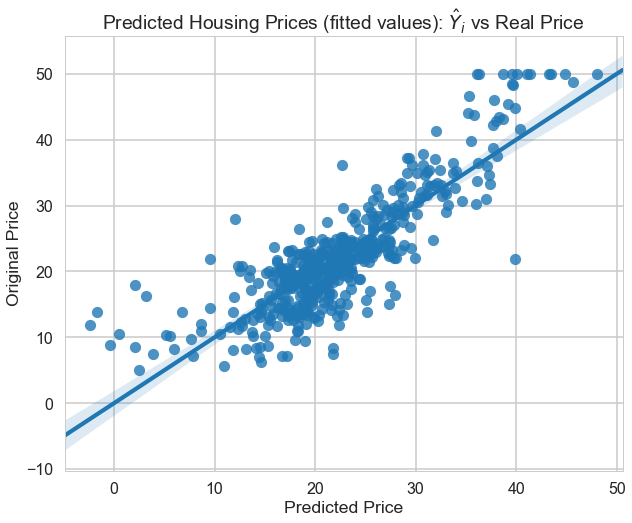

In [263]:
# plot the predicted price vs original price
plt.figure(figsize=(10,8))
sns.regplot(predicted_price, X.PRICE)
plt.title('Predicted Housing Prices (fitted values): $\hat{Y}_i$ vs Real Price' )
plt.xlabel('Predicted Price')
plt.ylabel('Original Price')
plt.show()


Sci-kit learn shows similar result as statmodels. There is an apparently linear relationship between the Orignial house price and the fitted values.

In conlcusion, removing outliers and leverage points did improve the model slightly. Now the parameters verifies all the assumptions of the regression analysis. At the same time, the model still has some scope of improvement. Sophisticated technique such as cross valiadation, hyper-parameter tuning will be some possible ways to improve the model. Adding more features may also prove to be effective. Due to the constraint of time and resources these recommendations are left for future experiments.